**Black-Scholes Pricing**

Underlying Price (S): 100
Strike Price (K): 100
Maturity (T): 1.0 year(s)
Risk-Free Rate (r): 5.00%
Volatility (sigma): 20.00%

Call Option Price: 10.4506
Put Option Price: 5.5735



**Monte Carlo Pricing**

Underlying Price (S): 100
Strike Price (K): 100
Maturity (T): 1.0 year(s)
Risk-Free Rate (r): 5.00%
Volatility (sigma): 20.00%
Simulations (M): 10000
Time Steps (N): 252

Call Option Price (MC): 10.7054
Put Option Price (MC): 5.5151



**Comparison between Black-Scholes and Monte Carlo**

Call Option:
Black-Scholes Price: 10.4506
Monte Carlo Price: 10.7054
Absolute Error: 0.2548
Relative Error (%): 2.4384

Put Option:
Black-Scholes Price: 5.5735
Monte Carlo Price: 5.5151
Absolute Error: 0.0584
Relative Error (%): 1.0478

Average Absolute Error: 0.1566


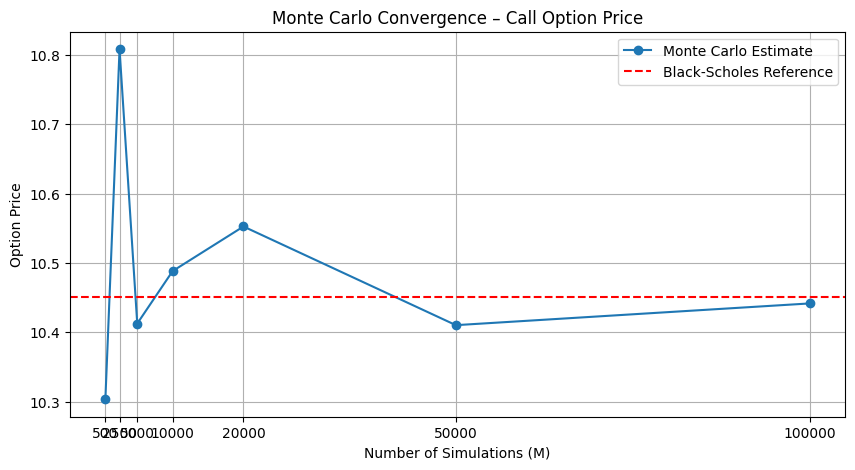

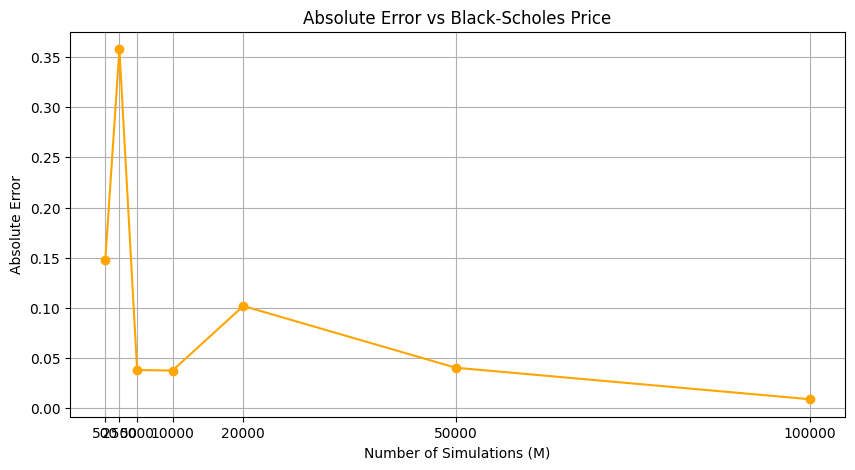

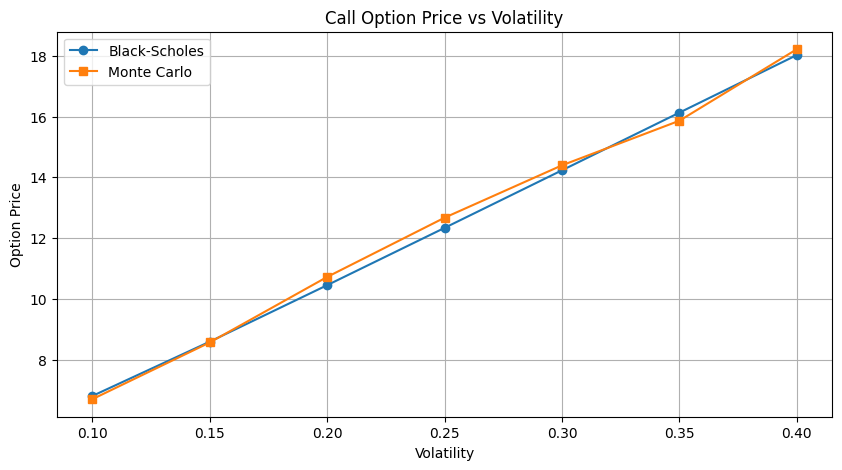

In [ ]:
# Pricing European Options: A Comparison Between Black-Scholes and Monte Carlo Method
import numpy as np
from scipy.stats import norm
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
from google.colab import files

# BLACK-SCHOLES PRICING FUNCTION
def black_scholes_price(S, K, T, r, sigma, option_type='call'):

# Parameters:
# S: Current asset price
# K: Strike price
# T: Time to maturity (years)
# r: Risk-free annualized interest rate
# sigma: Volatility of the underlying asset

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T) # d1 & d2 formula

    if option_type == 'call': # B&S formula for call and put options
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return price

# Defining parameters
S = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2

# Calculating prices
call_price_bs = black_scholes_price(S, K, T, r, sigma, option_type='call')
put_price_bs = black_scholes_price(S, K, T, r, sigma, option_type='put')

# Displaying results
display(Markdown("**Black-Scholes Pricing**")) # for printing in bold
print(f"Underlying Price (S): {S}") # printing with f-string
print(f"Strike Price (K): {K}")
print(f"Maturity (T): {T} year(s)")
print(f"Risk-Free Rate (r): {r*100:.2f}%") # .2f to choose the num. of decimals
print(f"Volatility (sigma): {sigma*100:.2f}%\n")

print(f"Call Option Price: {call_price_bs:.4f}")
print(f"Put Option Price: {put_price_bs:.4f}\n")

# MONTE CARLO PRICING FUNCTION
def monte_carlo_price(S, K, T, r, sigma, option_type='call', M=10000, N=252):

# Parameters:
# S: Current asset price
# K: Strike price
# T: Time to maturity (years)
# r: Risk-free annualized interest rate
# sigma: Volatility of the underlying asset
# M: Number of simulation
# N: Time steps per simulation

    # Preparing for the simulation:
    dt = T / N # length of every time step
    Z = np.random.standard_normal((M, N)) # mat of std nrm r.v. to simulate GBM
    S_paths = np.zeros((M, N + 1)) # matrix of 0s to store values
    S_paths[:, 0] = S # initial price = S in the first column

    for t in range(1, N + 1): # simulating the price evolution
        S_paths[:, t] = S_paths[:, t - 1] * np.exp(
            (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t - 1])
            # computing and storing prices with the GBM formula
            # using : to consider all rows

    S_T = S_paths[:, -1] # extracting the terminal value at T from every simul.
                         # using -1 to go to the last column

    # Computing payoff for call and put options
    if option_type == 'call':
        payoff = np.maximum(S_T - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - S_T, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    price = np.exp(-r * T) * np.mean(payoff) # discount of payoffs mean with r
    return price

# Defining parameters
S = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
M = 10000
N = 252

# Calculating prices
call_price_mc = monte_carlo_price(S, K, T, r, sigma, option_type='call', M=M, N=N)
put_price_mc = monte_carlo_price(S, K, T, r, sigma, option_type='put', M=M, N=N)

# Displaying results
display(Markdown("**Monte Carlo Pricing**"))
print(f"Underlying Price (S): {S}")
print(f"Strike Price (K): {K}")
print(f"Maturity (T): {T} year(s)")
print(f"Risk-Free Rate (r): {r*100:.2f}%")
print(f"Volatility (sigma): {sigma*100:.2f}%")
print(f"Simulations (M): {M}")
print(f"Time Steps (N): {N}\n")

print(f"Call Option Price (MC): {call_price_mc:.4f}")
print(f"Put Option Price (MC): {put_price_mc:.4f}\n")

# COMPARISON BETWEEN THE TWO METHODS

# Calculating errors
call_abs_error = abs(call_price_mc - call_price_bs)
call_rel_error = call_abs_error / call_price_bs * 100

put_abs_error = abs(put_price_mc - put_price_bs)
put_rel_error = put_abs_error / put_price_bs * 100
avg_abs_error = (call_abs_error + put_abs_error) / 2

# Displaying results
display(Markdown("**Comparison between Black-Scholes and Monte Carlo**"))
print("Call Option:")
print(f"Black-Scholes Price: {call_price_bs:.4f}")
print(f"Monte Carlo Price: {call_price_mc:.4f}")
print(f"Absolute Error: {call_abs_error:.4f}")
print(f"Relative Error (%): {call_rel_error:.4f}")

print("\nPut Option:")
print(f"Black-Scholes Price: {put_price_bs:.4f}")
print(f"Monte Carlo Price: {put_price_mc:.4f}")
print(f"Absolute Error: {put_abs_error:.4f}")
print(f"Relative Error (%): {put_rel_error:.4f}")

print(f"\nAverage Absolute Error: {avg_abs_error:.4f}")

# CONVERGENCE STUDY

# M values list
# We use different numbers of simulation
M_values = [500, 2500, 5000, 10000, 20000, 50000, 100000]
call_mc_prices = [] # initial empty list
errors = [] # initial empty list

# Black-Scholes reference price
call_bs_ref = black_scholes_price(S, K, T, r, sigma, option_type='call')

# Monte Carlo Simulation for the M values list
for M in M_values:
    price_mc = monte_carlo_price(S, K, T, r, sigma, option_type='call', M=M, N=N)
    call_mc_prices.append(price_mc) # attaching prices to the previous list
    errors.append(abs(price_mc - call_bs_ref)) # same for absolute error

# Plot of estimated price compared to B&S
plt.figure(figsize=(10, 5))
plt.plot(M_values, call_mc_prices, marker='o', label='Monte Carlo Estimate')
plt.axhline(call_bs_ref, color='red', linestyle='--', label='Black-Scholes Reference')
plt.title("Monte Carlo Convergence – Call Option Price")
plt.xlabel("Number of Simulations (M)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.xticks(M_values) # Set x-axis ticks
plt.savefig("mc_convergence_price.png", dpi=300)
plt.show()

# Absolute Error plot
plt.figure(figsize=(10, 5))
plt.plot(M_values, errors, marker='o', color='orange')
plt.title("Absolute Error vs Black-Scholes Price")
plt.xlabel("Number of Simulations (M)")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.xticks(M_values)
plt.savefig("mc_absolute_error.png", dpi=300)
plt.show()


# Automatic download
# files.download("mc_convergence_price.png")
# files.download("mc_absolute_error.png")

# SENSITIVITY ANALYSIS - VOLATILITY CASE
# Let's test the sensitivity of the two models in the volatility case
# Sigma values' list
sigma_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
bs_prices = [] # initial empty list
mc_prices = [] # initial empty list

# Calculation for every sigma
for sigma_ in sigma_values:
    bs_sa = black_scholes_price(S, K, T, r, sigma_, option_type='call')
    mc_sa = monte_carlo_price(S, K, T, r, sigma_, option_type='call', M=10000, N=252)
    bs_prices.append(bs_sa) # attaching B&S prices to the previous list
    mc_prices.append(mc_sa) # same for MC prices

# Plot Black-Scholes vs Monte Carlo
plt.figure(figsize=(10, 5))
plt.plot(sigma_values, bs_prices, marker='o', label='Black-Scholes')
plt.plot(sigma_values, mc_prices, marker='s', label='Monte Carlo')
plt.title("Call Option Price vs Volatility")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.savefig("sensitivity_volatility.png", dpi=300)
plt.show()

# Automatic download
# files.download("sensitivity_volatility.png")